In [55]:
# Step 2: Data Understanding
# This section explores the dataset to understand its structure, the problem to solve, and the data distribution.
#1. Understand the Nature of the Data and Structure

In [79]:
#laibraries will use it in the AI Project
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [20]:
pd.__version__

'2.2.2'

In [28]:
# Load the dataset
file_path = '../data/TG_T_CashValues_Rel.xlsx'
df = pd.read_excel(file_path, sheet_name='TG80_T_Barwerte')

In [27]:
#show the dataframe
df

,Gender,Age,Dur,PPV
0,Male,0,20,15.198437
1,Male,0,21,15.741015
2,Male,0,22,16.267189
3,Male,0,23,16.777448
4,Male,0,24,17.272269
...,...,...,...,...
5265,Female,78,2,1.925421
5266,Female,78,3,2.777638
5267,Female,79,1,1.000000
5268,Female,79,2,1.920897


In [31]:
# 1. Display basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5270 entries, 0 to 5269
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  5270 non-null   object 
 1   Age     5270 non-null   int64  
 2   Dur     5270 non-null   int64  
 3   PPV     5270 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 164.8+ KB
None


In [59]:
#list the row label and column names
df.axes

[RangeIndex(start=0, stop=5270, step=1),
 Index(['Gender', 'Age', 'Dur', 'PPV'], dtype='object')]

In [35]:
#display the first 5 rows
df.head()

,Gender,Age,Dur,PPV
0,Male,0,20,15.198437
1,Male,0,21,15.741015
2,Male,0,22,16.267189
3,Male,0,23,16.777448
4,Male,0,24,17.272269


In [36]:
# Display the last 5 rows in dataset
print(df.tail())

      Gender  Age  Dur       PPV
5265  Female   78    2  1.925421
5266  Female   78    3  2.777638
5267  Female   79    1  1.000000
5268  Female   79    2  1.920897
5269  Female   80    1  1.000000


In [38]:
#display option that controls the maximum number of rows shown when displaying a DataFrame or Series in the console.
print(pd.options.display.max_rows)

60


In [44]:
#2. Check for missing values in the dataset
print(df.isnull().sum())

Gender    0
Age       0
Dur       0
PPV       0
dtype: int64


In [57]:
#3. Check types for all the columns Data Types
df.dtypes

,0
Gender,object
Age,int64
Dur,int64
PPV,float64


In [58]:
#4. generate descriptive statistics for numeric column
print(df.describe())

               Age          Dur          PPV
count  5270.000000  5270.000000  5270.000000
mean     31.294118    22.882353    14.858158
std      18.671548    13.793388     7.025862
min       0.000000     1.000000     1.000000
25%      16.000000    11.000000     9.374980
50%      30.000000    22.000000    15.703883
75%      45.000000    34.000000    20.953996
max      80.000000    50.000000    26.024118


In [65]:
#5.Detect Outliers using Z-score

# Selecting numerical columns only (excluding any non-numeric columns such as strings)
numerical_columns = df.select_dtypes(include=[np.number]).columns
print(numerical_columns)

Index(['Age', 'Dur', 'PPV'], dtype='object')


In [68]:
# Z-score calculation
z_scores = np.abs(stats.zscore(df[numerical_columns]))
print(z_scores)

           Age       Dur       PPV
0     1.676191  0.208986  0.048437
1     1.676191  0.136481  0.125670
2     1.676191  0.063975  0.200568
3     1.676191  0.008530  0.273201
4     1.676191  0.081035  0.343636
...        ...       ...       ...
5265  2.501684  1.514083  1.840908
5266  2.501684  1.441578  1.719599
5267  2.555247  1.586588  1.972637
5268  2.555247  1.514083  1.841552
5269  2.608809  1.586588  1.972637

[5270 rows x 3 columns]


In [70]:
# Set threshold to 3 for outlier detection
threshold = 3
outliers_z = (z_scores > threshold)

In [71]:
# Output rows with outliers detected by Z-score
outliers_z_df = df[outliers_z.any(axis=1)]
print("\nOutliers Detected Using Z-Score:")
print(outliers_z_df)


Outliers Detected Using Z-Score:
Empty DataFrame
Columns: [Gender, Age, Dur, PPV]
Index: []


In [73]:
# Detect Outliers using IQR (Interquartile Range)

# Calculate Q1 (25th percentile) and Q3 (75th percentile) for each numerical column
Q1 = df[numerical_columns].quantile(0.25)
Q3 = df[numerical_columns].quantile(0.75)

In [75]:
# Calculate IQR (Interquartile Range)
IQR = Q3 - Q1
print(IQR)

Age    29.000000
Dur    23.000000
PPV    11.579016
dtype: float64


In [76]:
# Define outliers based on IQR (outliers are outside the range [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR])
outliers_iqr = (df[numerical_columns] < (Q1 - 1.5 * IQR)) | (df[numerical_columns] > (Q3 + 1.5 * IQR))

# Output rows with outliers detected by IQR
outliers_iqr_df = df[outliers_iqr.any(axis=1)]
print("\nOutliers Detected Using IQR:")
print(outliers_iqr_df)


Outliers Detected Using IQR:
Empty DataFrame
Columns: [Gender, Age, Dur, PPV]
Index: []


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128680 (\N{POLICE CARS REVOLVING LIGHT}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


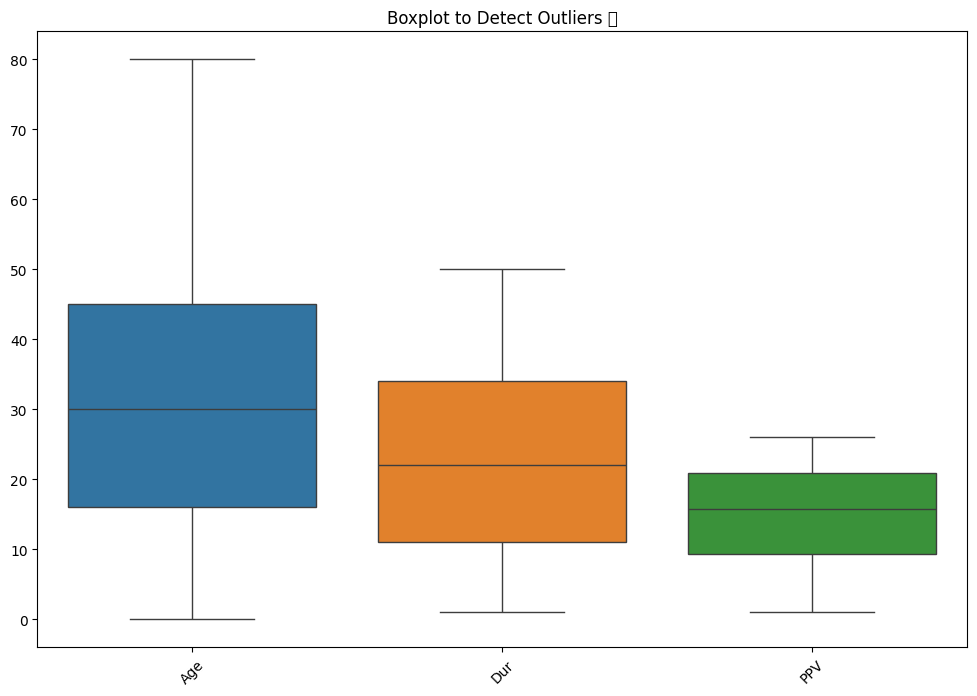

In [77]:
# Create a boxplot for each numerical column to visually inspect outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[numerical_columns])
plt.title("Boxplot to Detect Outliers 🚨")
plt.xticks(rotation=45)
plt.show()

<Axes: >

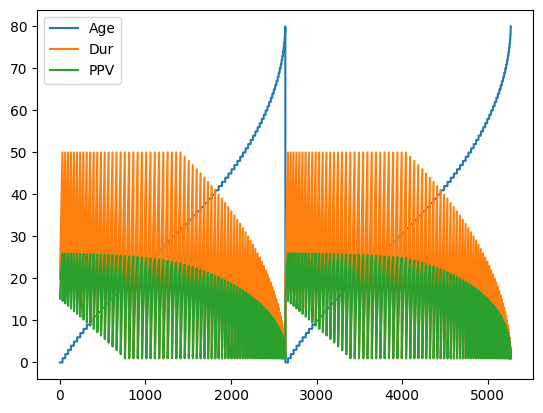

In [42]:
# Default line plot
df.plot()

# Explanation of the Code:
### Load the Dataset:

The dataset is loaded using pd.read_excel(), specifying the file path and the sheet name (TG80_T_Barwerte). This function reads the data from an Excel file into a pandas DataFrame, which is a structured format for handling tabular data in Python.

### Z-Score Detection:

The Z-score is computed for each numerical column using stats.zscore(). The Z-score tells you how many standard deviations a value is away from the mean.
We then identify outliers by checking if the Z-score for a value exceeds a threshold of 3. A Z-score greater than 3 or less than -3 indicates that the value is unusually far from the mean, which can be considered an outlier.
This method assumes that the data is normally distributed, where extreme values are considered anomalies.

### IQR Detection:

* The Interquartile Range (IQR) is  calculated by finding the first quartile (Q1) and third quartile (Q3) of the data.

* The IQR is simply the range between these two quartiles (Q3 - Q1), and it represents the middle 50% of the data.

* This rule is commonly used to flag values that are unusually far from the main distribution of data.
This method is particularly useful when the data may not follow a normal distribution.

### Boxplot Visualization:

* A boxplot is generated using seaborn.boxplot(). This plot visually shows the distribution of the data and highlights potential outliers.

* In a boxplot, the "whiskers" represent the range of values within 1.5 * IQR from Q1 and Q3. Data points that fall outside this range are shown as individual points and are considered potential outliers.

* Boxplots are a good way to visually inspect the presence of outliers in the dataset.


## Conclusion:
This approach combines both statistical methods (Z-score and IQR) and visualization (boxplots) to identify outliers in the dataset. By detecting outliers, we can ensure that the data quality is high before moving on to further analysis or model training. Outliers can distort the results of statistical models, so it’s important to identify and handle them appropriately to improve the accuracy of predictions.

In [81]:
#6. Correlation Analysis
# Select only numeric columns for correlation
df_numeric = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = df_numeric.corr()

In [82]:
# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
          Age       Dur       PPV
Age  1.000000 -0.507243 -0.565087
Dur -0.507243  1.000000  0.978774
PPV -0.565087  0.978774  1.000000


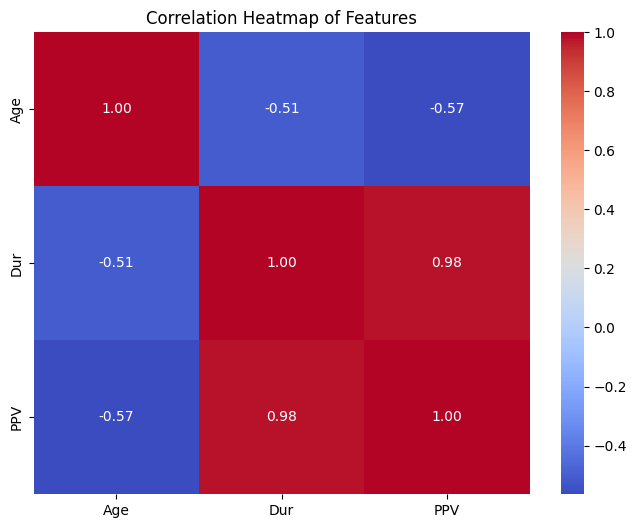

In [83]:
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Heatmap of Features')
plt.show()

In [84]:
# Correlation between PPV and other features
ppv_correlation = correlation_matrix['PPV']
print("\nCorrelation of Features with PPV:")
print(ppv_correlation)


Correlation of Features with PPV:
Age   -0.565087
Dur    0.978774
PPV    1.000000
Name: PPV, dtype: float64


# Correlation Analysis:
## Age and PPV:

* Correlation: -0.565 (moderate negative correlation).
* Interpretation: As the age increases, the PPV tends to decrease. While this relationship is not extremely strong, it is significant enough to consider age as a feature in the model.

## Duration (Dur) and PPV:

* Correlation: 0.979 (strong positive correlation).
* Interpretation: There is a very strong positive correlation between Duration and PPV, indicating that Duration is likely a very important feature in predicting PPV. The longer the duration, the higher the predicted value of PPV.

## PPV and PPV:

* Correlation: 1.000 (perfect correlation).
* Interpretation: This is expected since a variable is always perfectly correlated with itself.